In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


# Data and Target

In [3]:
dataset = df.values
data = dataset[:,0:7]
target = dataset[:,7]



In [4]:
print(data)


[[  1.  48. 236. ...   0.   1.   0.]
 [  0.  48. 260. ...   0.   1.   1.]
 [  0.  44. 187. ...   1.   1.   0.]
 ...
 [  0.  65. 212. ...   1.   0.   0.]
 [  0.  66. 184. ...   0.   0.   0.]
 [  1.  45. 203. ...   0.   1.   0.]]


In [5]:
print(target)

[ 1.1  7.   7.  ... 30.6 23.8  1. ]


# Scaling
####  In classification problems this should do for features only. But in Regression proplem this should do for both fetures and labels.

In [6]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

#scaler_data.fit(data)
#data_scaled=scaler_data.transform(data)

#scaler_target.fit(target)

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)
 

In [7]:
print(data[:10])

[[  1.  48. 236.  66.   0.   1.   0.]
 [  0.  48. 260.  51.   0.   1.   1.]
 [  0.  44. 187.  49.   1.   1.   0.]
 [  1.  42. 216.  57.   1.   1.   0.]
 [  1.  56. 156.  42.   0.   1.   0.]
 [  0.  44. 162.  57.   1.   1.   0.]
 [  0.  50. 244.  47.   0.   1.   0.]
 [  0.  48. 212.  30.   1.   1.   0.]
 [  1.  66. 202.  53.   0.   1.   1.]
 [  0.  63. 186.  46.   1.   1.   0.]]


In [8]:
print(data_scaled[:10])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


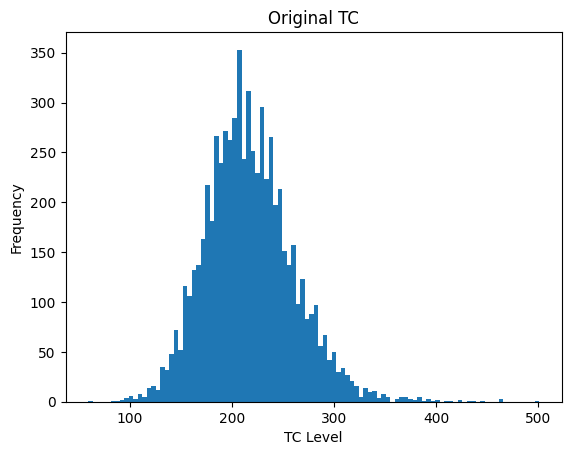

In [9]:
plt.hist(data[:,2],bins=100)
plt.title('Original TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

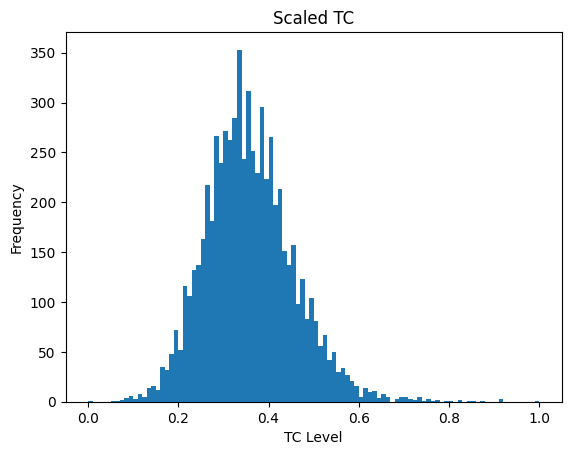

In [10]:
plt.hist(data_scaled[:,2],bins=100)
plt.title('Scaled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

## train_test_split

#### This function splits your dataset into two parts:
####          Training set: used to train (teach) the model.
####          Test set: used to test how well the model performs on unseen data.



In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data_scaled, target_scaled,test_size=0.1)  

# FFNN Architecture

##### * Sequential means your model is a stack of layers, one after the other.
##### * linear activation means: no transformation; it outputs raw values (good for regression)
##### * ReLU → helps the network learn non-linear relationships.
##### * Dropout is used to prevent overfitting by randomly turning off some neurons during training.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Dropout
import numpy as np

model = Sequential() 
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear')) 

model.compile(optimizer='adam',loss='mse',metrics=['mae'])  # mean squared error and mean absolute error

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,941 (38.83 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_data,train_target,epochs = 200 , validation_data = (test_data,test_target))

Epoch 1/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0440 - mae: 0.1434 - val_loss: 0.0224 - val_mae: 0.1011
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0172 - mae: 0.0943 - val_loss: 0.0159 - val_mae: 0.0877
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0137 - mae: 0.0869 - val_loss: 0.0129 - val_mae: 0.0798
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0129 - mae: 0.0801 - val_loss: 0.0122 - val_mae: 0.0751
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0114 - mae: 0.0737 - val_loss: 0.0101 - val_mae: 0.0679
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122 - mae: 0.0756 - val_loss: 0.0104 - val_mae: 0.0693
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - mae: 0.0718 - val_loss: 0.0087 - val_mae: 0.0644
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0093 - mae: 0.0671 - val_loss: 0.0084 - val_mae: 0.0643
Epoch 9/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

#### We can say whether the trained is anough or not by looking at the loss graph

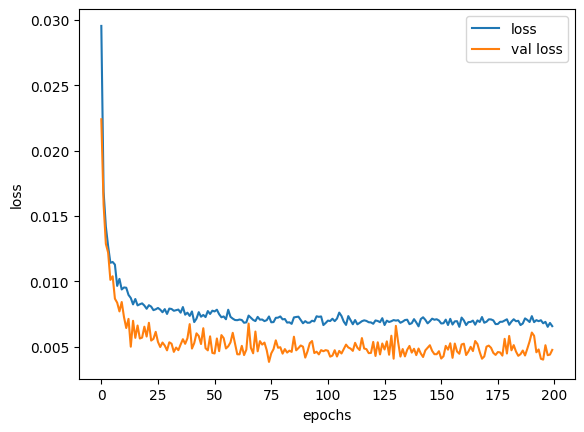

In [20]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

##### We can't mesure the accurecy in regression problem. We use R2 Score to evaluate the model performence

In [21]:
from sklearn.metrics import r2_score

predicted_result=model.predict(test_data)

r2=r2_score(test_target,predicted_result)
print('r2 score:',r2)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
r2 score: 0.821734188444705


In [22]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.1066823  0.00117233 0.2989449  0.04337632 0.05275498 0.00468933
  0.22039859 0.24736225 0.91910903 0.10082063]]
predicted: [[0.08858494 0.04827417 0.18996616 0.06741457 0.10005554 0.05115958
  0.14789402 0.3034835  0.5740497  0.07567329]]


In [23]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[ 9.2  0.2 25.6  3.8  4.6  0.5 18.9 21.2 78.5  8.7]]
predicted inverse scaled: [[ 7.6562953  4.2177873 16.304113   5.8504624  8.634737   4.463912
  12.715361  25.98714   49.066437   6.5549316]]
